<a href="https://colab.research.google.com/github/Dogyun-Kim57/AI_26/blob/main/05_01_%EA%B2%B0%EC%A0%95%ED%8A%B8%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# MBC 마켓에서 신상품으로 캔 와인을 판매하려고 한다.
# 주류는 온라인 판매가 안되서 온라인 예약 후에
# 오프라인 매장에서 구매를 유도하려고 함

# 입고된 와인을 보니 레드와인인지 화이트와인인지 구분표시가 안되어있는 상태..
# 캔에 인쇄된 알콜도수, 당도, PH 값으로 와인 종류를 구별해보자.

# 품질 확인용으로 뜯은 캔이 테스트용으로 있고 이것을 데이터로 활용
# 로지스틱 회귀 모델로 적용을 해서 알아보자.

# 요약 : 알콜도수,당도,PH의 정보를 가지고 레드 와인과 화이트 와인을 구분하라!

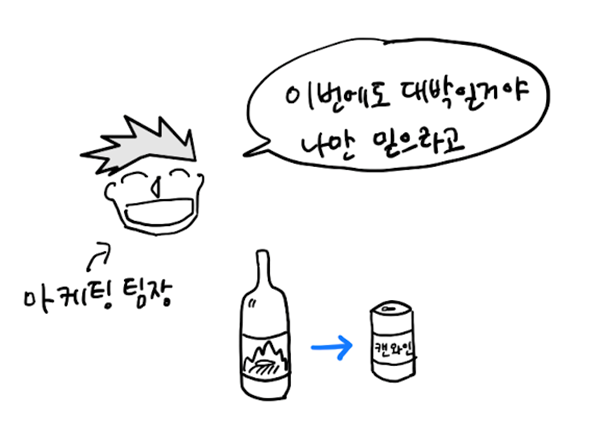

In [1]:
# 와인에 특성화된 데이터를 넣자.
import pandas as pd

wine = pd.read_csv('https://bit.ly/wine_csv_data')
wine.head()
# 알콜, 당도, 산도, 클래스( 타겟 = 0 일시 레드와인, 1일시 화이트 와인 )
# 데이터에서 화이트 와인이 양성 클래스로 화이트 와인을 표시하는게 문제


,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [2]:
wine.info()
# 결과 = 6407개의 샘플과 4개의 열(실수형)
# Non-Null 누락된 겂이 없음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [3]:
wine.describe() # 열에 대한 통계
# mean = 평균, std = 표준편차, min = 최소
# 25% = 1사 분위수, 50% = 중간값 (2사 분위), 75% = 3사 분위, max = (100%, 4사 분위)
# 사분위수 : 데이터를 순서대로 4등분한 값

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


In [5]:
# StandardScaler 클래스로 특성을 표준화 해야함
data = wine[['alcohol', 'sugar', 'pH']].to_numpy()       # 넘파이 배열로 변환
# 와인 데이터 프레임에서 처음 3개의 열을 넘파이 배열로 바꿔서 data 배열에 저장

target = wine['class'].to_numpy()
# class 열을 넘파이 배열로 바꿔서 target(정답) 배열에 저장

print(data)       # 훈련 입력값

[[ 9.4   1.9   3.51]
 [ 9.8   2.6   3.2 ]
 [ 9.8   2.3   3.26]
 ...
 [ 9.4   1.2   2.99]
 [12.8   1.1   3.34]
 [11.8   0.8   3.26]]


In [6]:
print(target)

[0. 0. 0. ... 1. 1. 1.]


In [7]:
# 훈련 세트와 테스트 세트로 나누자!
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    data, target, test_size=0.2, random_state=42)

# train_test_split() 함수는 설정값을 지정하지 않으면 25%를 테스트로 저장
# test_size=0.2 를 입력하여, 전체 데이터의 20% 정도만 테스트 세트로 지정

print(train_input.shape, test_input.shape)

(5197, 3) (1300, 3)


In [ ]:
# 일단 훈련을 하기 위해 기존에 했던것처럼 전처리를 하여, 스케일을 조정해보자

from sklearn.preprocessing import StandardScaler
# 훈련세트 전처리 ( 표준점수로 변환 : 단위를 맞추는 효과 )
ss = StandardScaler()
ss.fit(train_input) # 전처리 훈련 시작!

train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)


print(train_scaled)
print('---------------')
print(test_scaled)


In [10]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()               # 로지스틱 회귀 모델 훈련
lr.fit(train_scaled, train_target)      # 훈련시작

print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

# 결론 = 80점 이하로 점수가 낮게 나옴 ( 과소 적합 )

0.7808350971714451
0.7776923076923077


In [11]:
# 제출용 보고서를 만들어 본다면?
print(lr.coef_, lr.intercept_)         # 로지스틱 회귀(계수 = 가중치,  절편 = 더해지는 값)

[[ 0.51268071  1.67335441 -0.68775646]] [1.81773456]


In [ ]:
# < 보고서 내용 >
# 알콜 도수값이 0.51268071를 곱하고,
# 당도에 1.67335441를 곱하고,
# pH값에 -0.68775646을 곱한 다음 모두 더함
# 위에 나온 값에 절편 1.81773456을 더함
# 이값이 0보다 크면 화이트 와인, 작으면 레드와인
# 현재 77% 정도 정확히 화이트 와인으로 분류 완료!!!!

# < AI를 모르는 팀장 반응 >
# 뭔소리임?

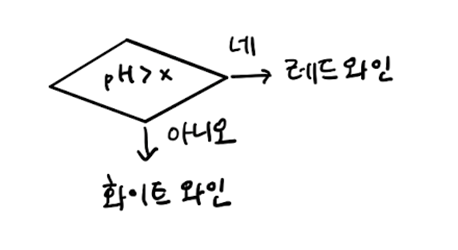

In [13]:
# 이런 반응이 충분히 나올 수 있기 때문에..
# 해당 상황에서는 '결정 트리'를 이용하는게 좋음 ( 이유를 설명하기가 쉬움. )
# 사용하는 방법은 if문을 사용하는 것과 유사함

from sklearn.tree import DecisionTreeClassifier       # ( Decision : 결정 [디시전] )

# DecisionTreeClassfier 결정 트리 모델로 훈련
from sklearn.tree import DecisionTreeClassifier       # ( Decision : 결정 [디시전] )
dt = DecisionTreeClassifier(random_state=42)
dt.fit(train_scaled, train_target)           # 훈련시작

print(dt.score(train_scaled, train_target))          # 훈련 세트
print(dt.score(test_scaled, test_target))            # 테스트 세트
# 과대 적합됨 ( 훈련점수 99.69%, 테스트 점수 85/92% )

0.996921300750433
0.8592307692307692


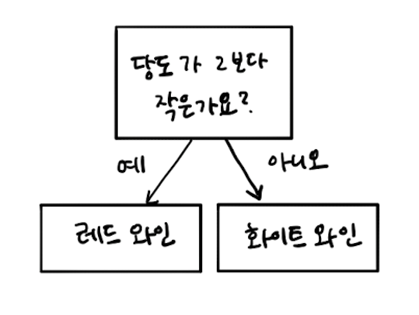

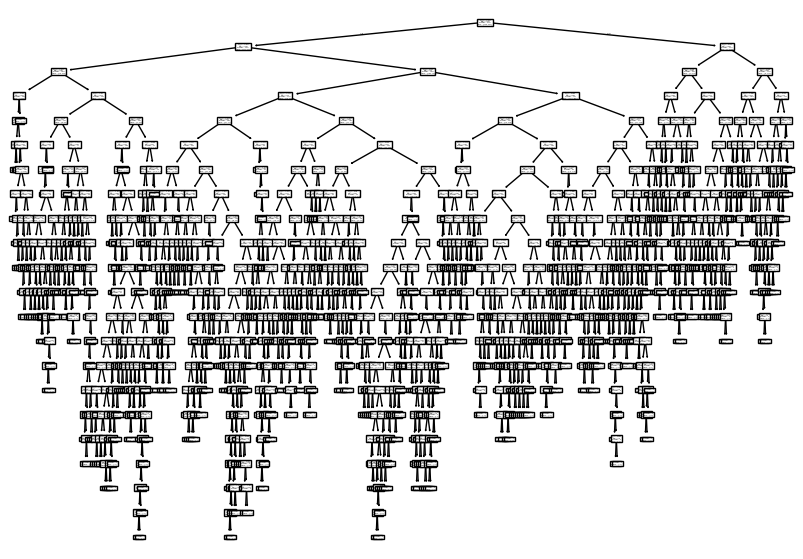

In [16]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(10,7))       # figure ( 형태, 도형 )
# figsize = (20,15)   그래프의 사이즈 ( 가로인치, 세로인치 )
plot_tree(dt)
plt.show()
#. 맨 위 노드 (루트노드), 맨 아래 노드(리프노드)

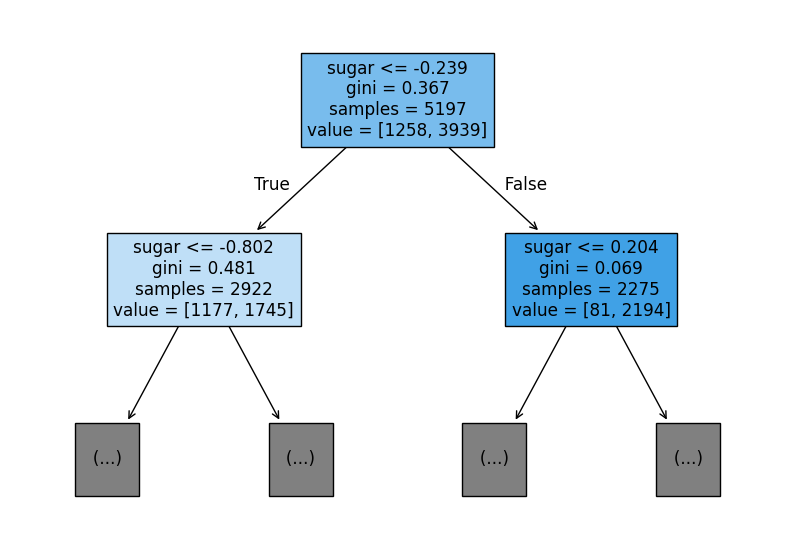

In [17]:
plt.figure(figsize=(10,7))
plot_tree(dt, max_depth=1, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
# max_depth=1 루트노드를 제외
# filled=True 클래스에 맞게 색칠
# feature_names=['alcohol', 'sugar', 'pH']
plt.show()
# sugar가 -0.239보다 이상이면 false
# sugar가 -0.239보다 같거나 작으면 true (왼쪽 가지로)
# 총샘플 수는 5,197개, 음성클래스(레드와인) 1,258개, 양성클래스(화이트와인) 3,939개

# 아래쪽 노드에 왼쪽 노드를 살펴보자
# 이 노드는 당도가 더 낮은지를 물어보는 노드 (-0.802)
# 당도가 -0.802와 같거나 낮다면 다시 왼쪽으로
# 그렇지 않으면 오른쪽으로 이동, 음성클래스 1,177개, 양성클래스 1,745개

# gini = 0.367 (불순도)
# sample = 5197 (총샘플수)
# value = 값 (1258(1), 3939(0))

In [ ]:
# 노드의 바탕색을 유심히 보면 루트 노드보다 더 진하고, 왼쪽 노드는 연해짐
# filled = Ture 로 지정하면 클래스마다 색깔을 지정함!
# 비율이 높아지면 점점 진하게 표시됨

# 결정트리에서 예측하는 방법은 더욱 간단한데..
# 리프노드에서 가장 많은 클래스가 예측 클래스가 됨
# 만약 이 결정 트리로 설장을 멈춘다면, 왼쪽 노드에 도달한 샘플과 오른쪽 노드에 노달한 샘플은
# 모두 양성 클래스로 예측된다. ( 양성 클래스가 많음 )

# gini 불순도로 노드에서 데이터를 분할할 기준을 정하는 값

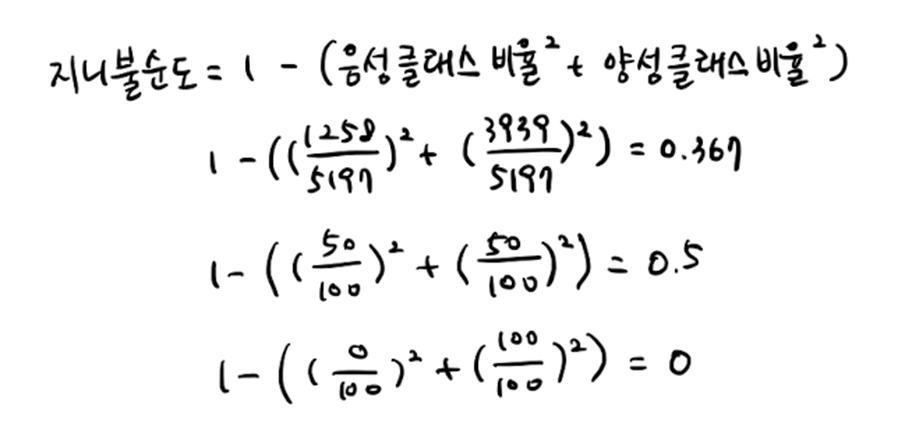

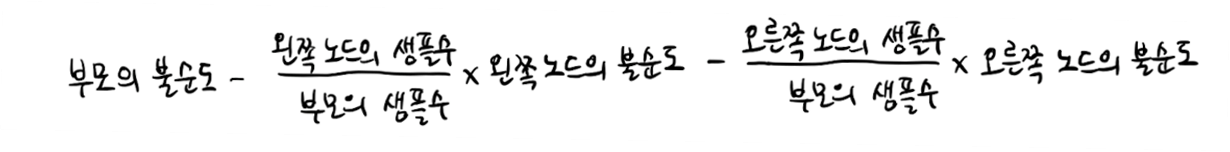

In [18]:
# 가지치기 : 열매를 잘 맺기 위해서 가지치기를 하듯이 결정 트리에서도 활용한다.
# 가지치기를 하지 않으면 무작정 끝까지 자라나는 트리를 만듬
# 트리의 깊이(depth)를 지정하면 된다.

# 새로운 객체를 깊이 3으로 만든다.
dt = DecisionTreeClassifier(max_depth=3, random_state=42)        # 트리의 깊이 max_depth=3
dt.fit(train_scaled, train_target)

print(dt.score(train_scaled, train_target))          # 84.54%
print(dt.score(test_scaled, test_target))            # 84.15%

0.8454877814123533
0.8415384615384616


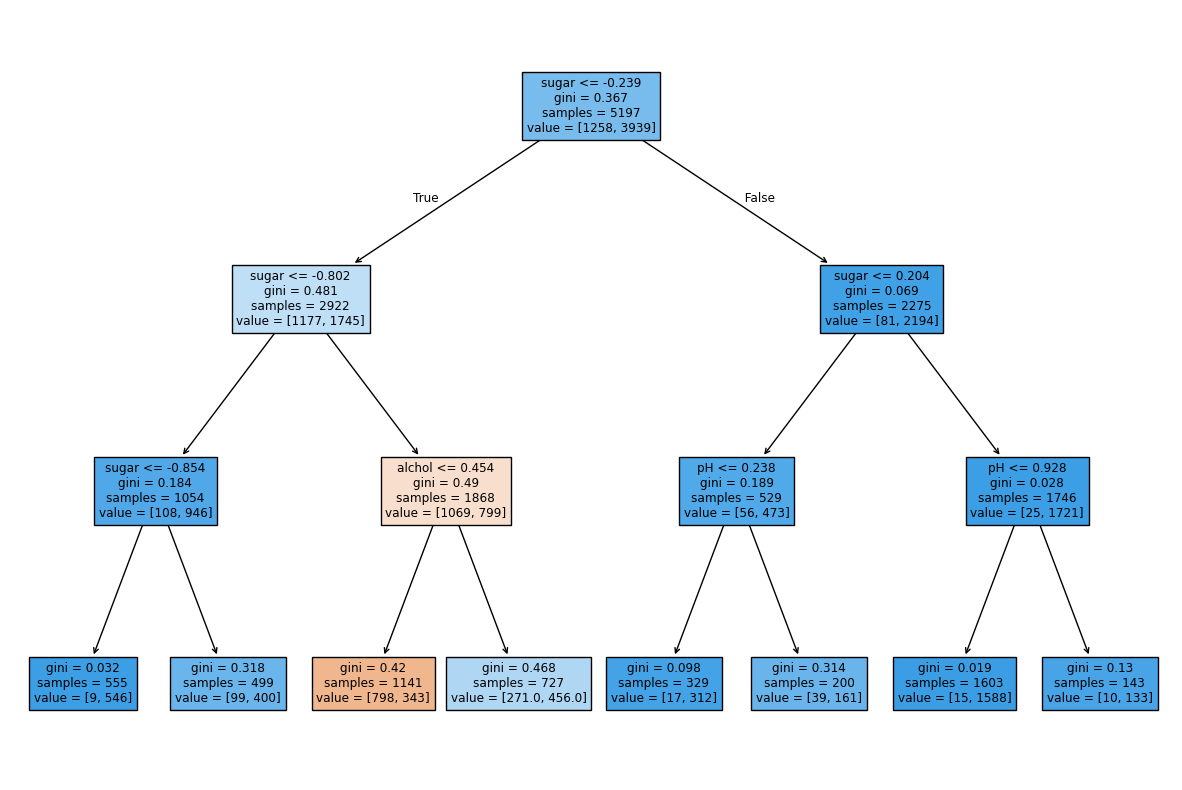

In [25]:
plt.figure(figsize=(15,10))
plot_tree(dt, filled=True, feature_names=['alchol', 'sugar', 'pH'])
plt.show()

In [26]:
# 그래프 분석
# 루트노드(depth=0) 다음 깊이에 있는 depth=1 노드는 모두 당도를 기준으로 훈련 세트를 나눈것
# 하지만 depth=2 에서는 맨 왼쪽 노드만 당도를 기준으로 나누고 왼쪽에서 두번째 노드는 알콜
# 즉, 도수를 기준으로 나눔. 오른쪽 두번째 노드는 ph를 사용한다.

# depth=3에 있는 노드가 최종 노드인 리프 노드이다.
# 왼쪽에서 세번째 있는 노드만 음성 클래스가 많다.
# 이 노드에 도착해야만 레드 와인으로 예측함.


# < 결론 >
# 당도는 -0.239 보다 작고 -0.832보다 커야 함
# 알콜 도수는 0.454보다 작으면 레드 와인이다.

# 그러나 -802라는 음수로 된 당도를 상사에게 보고 할 수 있나?
# 그렇기 때문에 표준화(표준점수) 전처리를 하지 않고, 결정 트리를 사용해보자. ( 특성값에 스케일은 효과가 없다. )

dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_input, train_target)

print(dt.score(train_input, train_target))      # 84.52%
print(dt.score(test_input, test_target))        # 84.15%

0.8454877814123533
0.8415384615384616


In [29]:
import numpy as np

sample = np.array([9.5, 1.6, 3.17])
sample = sample.reshape(1,-1)

dt.predict(sample)

# 타겟 = 0 (레드) ,  1(화이트)

array([1.])

In [32]:
# 이번에는 해당 결과값을 명칭으로 출력해보기

pred = dt.predict([[9.5, 1.6, 3.17 ]])

if pred[0] == 0:
  print("레드 와인")
else:
  print("화이트 와인")

화이트 와인


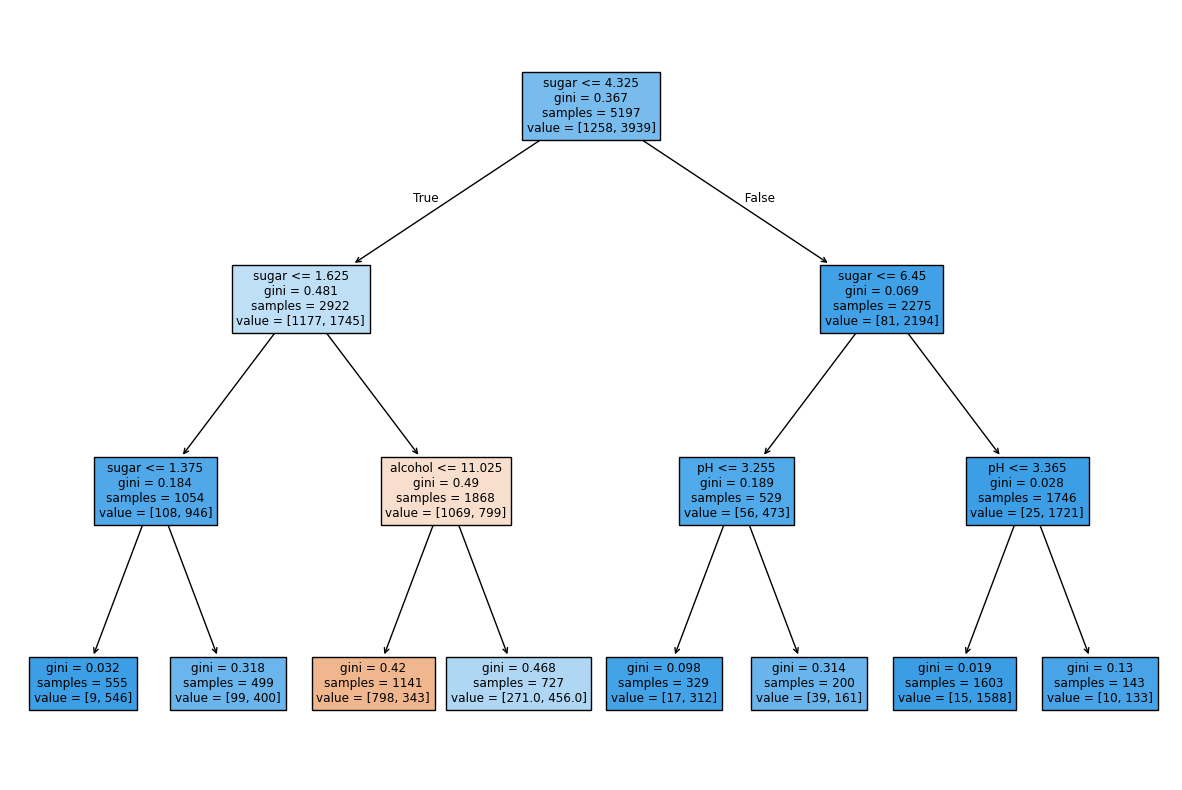

In [34]:
plt.figure(figsize=(15,10))
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

In [ ]:
# 결과 보고서에 넣을 내용
# 당도가 1.625보다 크고 4.325보다 작은 와인 중에서
# 알콜 도수가 11.025와 같거나 작은것이 레드와인으로 판단됨.
# 위 트리에서 주황색 부분이 레드와인으로 판단되고 나머지는 화이트 와인이다!

In [35]:
# 결정 트리는 어떤 특성이 가장 유용했는지 나타내는 특성 중요도를 계산해줌
print(dt.feature_importances_)
# 결과 = 당도>알콜>산도 순으로 중요도가 책정됨

[0.12345626 0.86862934 0.0079144 ]


In [36]:
# 좌우가 균일하지 않은 트리
dt = DecisionTreeClassifier(min_impurity_decrease=0.0005, random_state=42)
# min_impurity_decrease : 최소 불순도
dt.fit(train_input, train_target)

print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))

# 훈련용 : 88%
# 테스트 : 86%

0.8874350586877044
0.8615384615384616


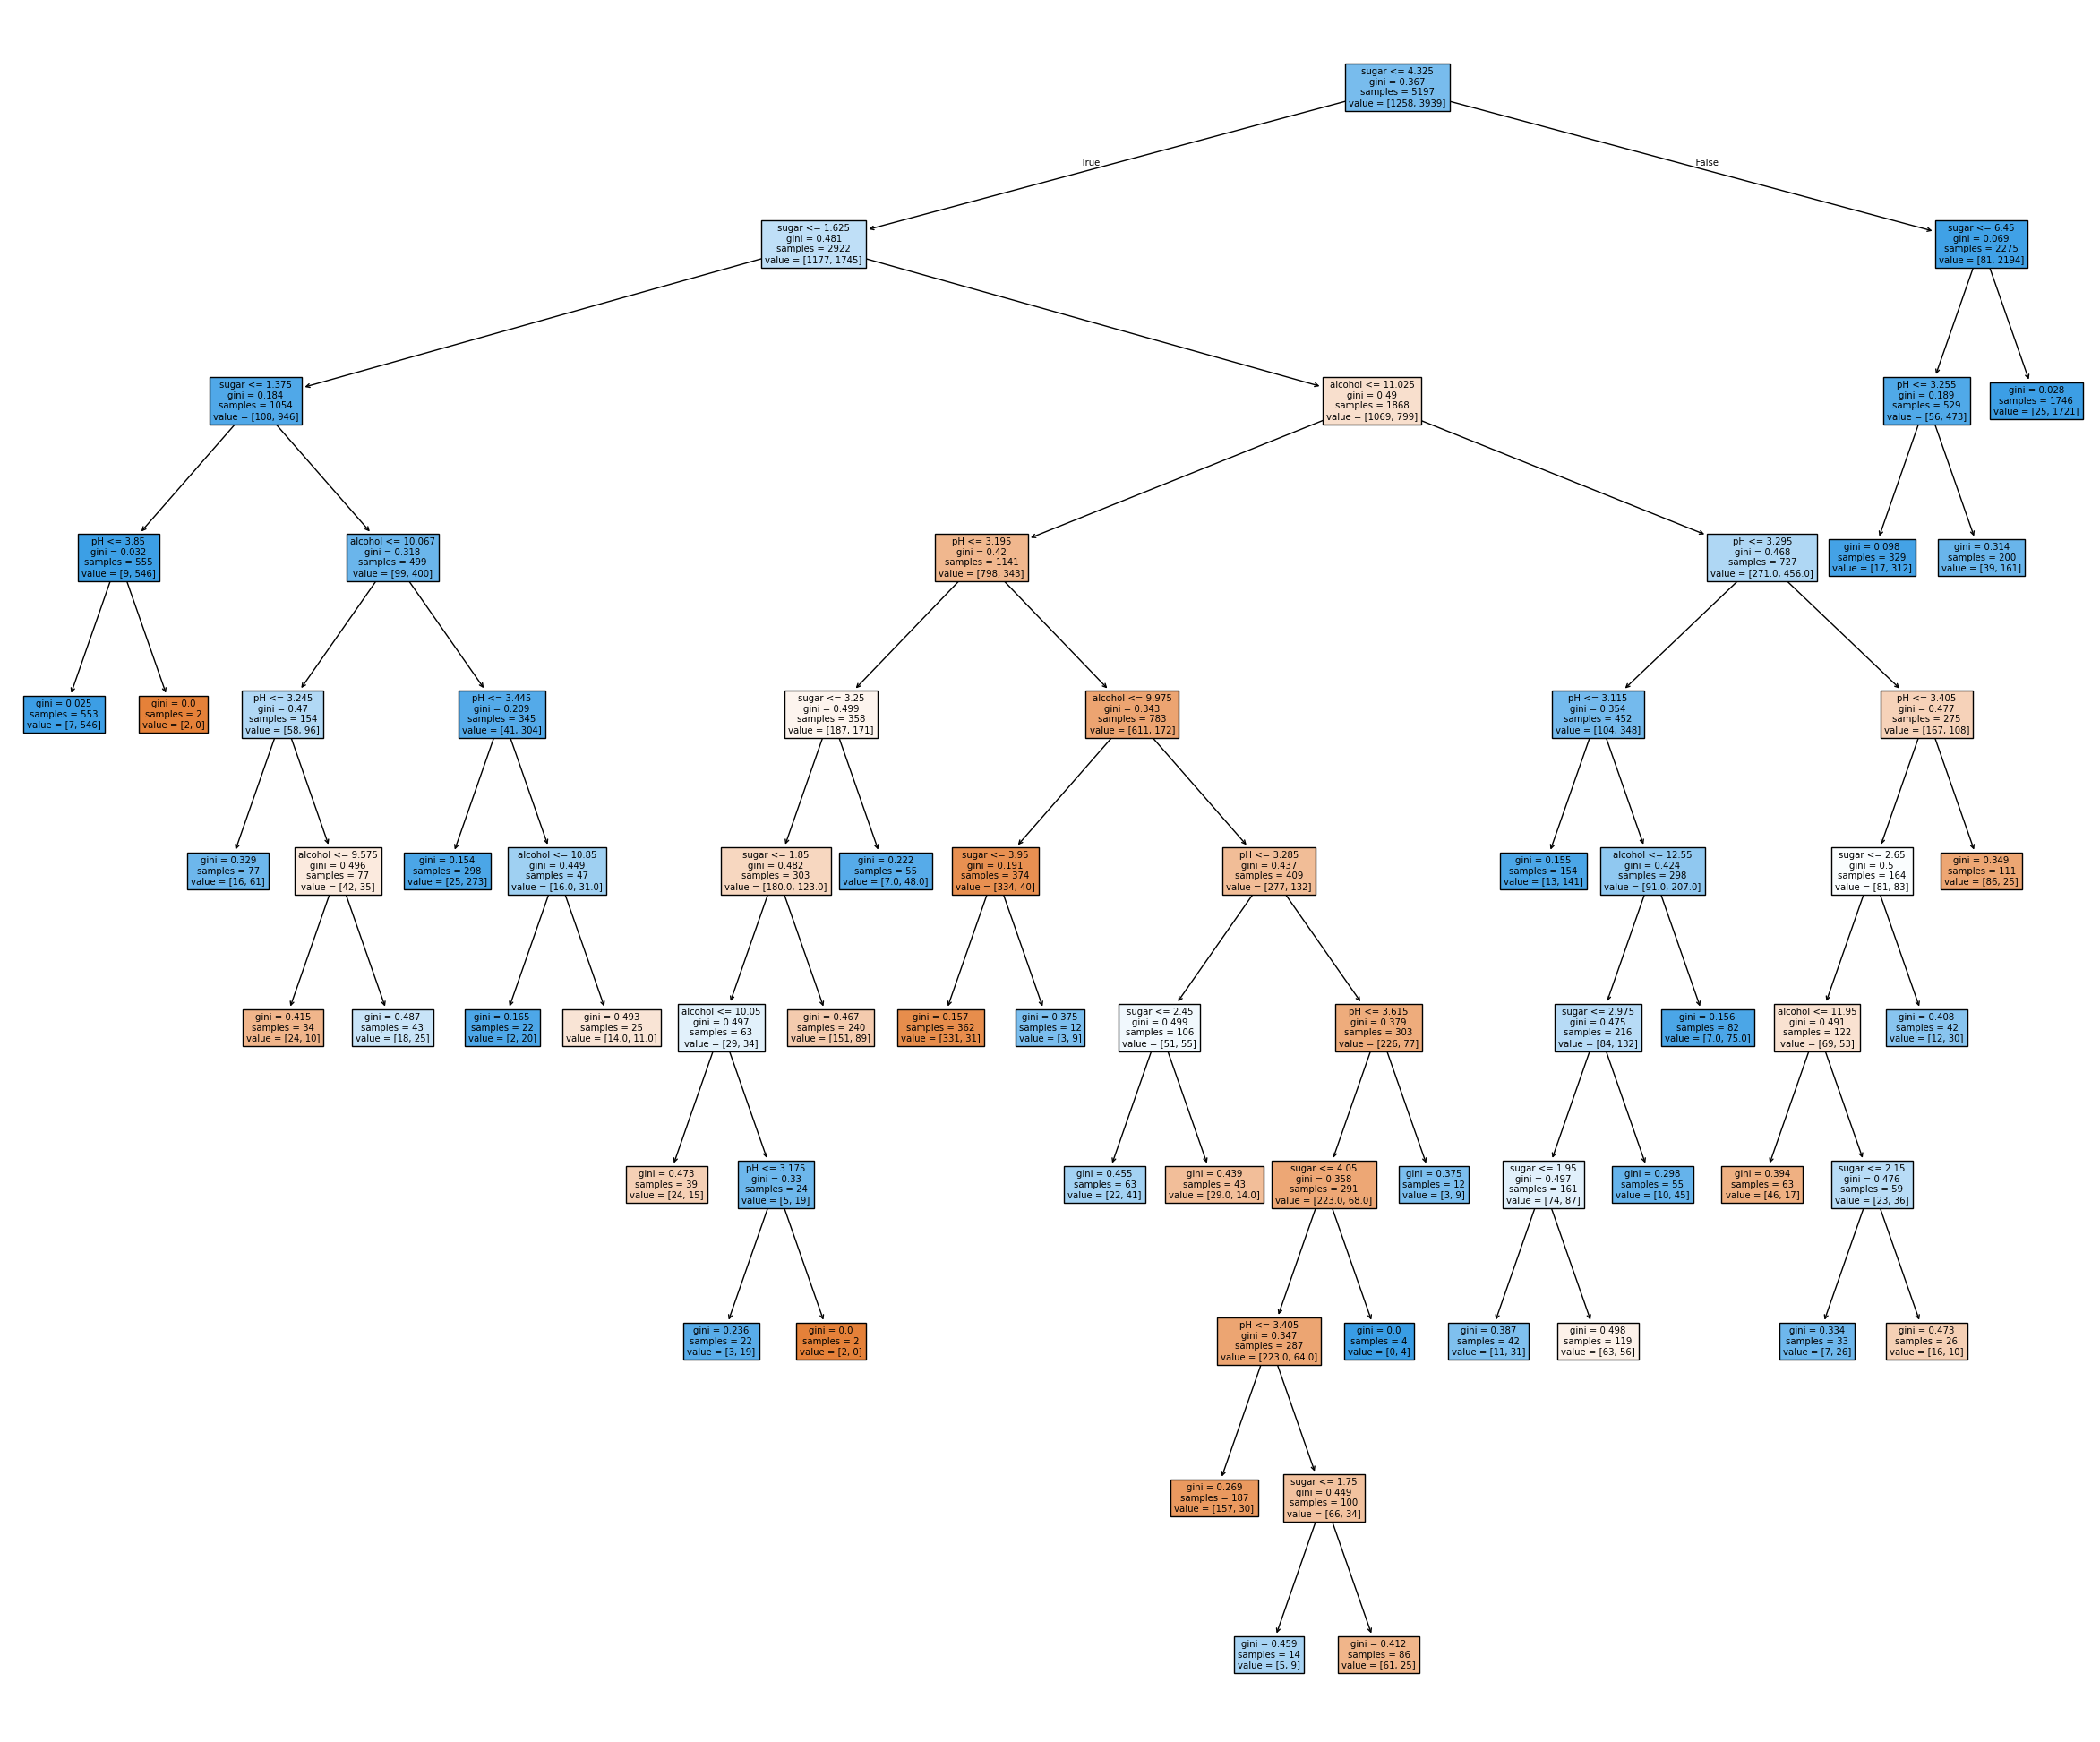

In [40]:
plt.figure(figsize=(30,25))
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()